In [72]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score , mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures

## make sample of data 

In [73]:
x = np.radians(np.linspace(-10 , 200 , 50)).reshape(-1,1)

In [74]:
x.shape


(50, 1)

In [75]:
y= np.cos(x) + np.random.uniform(-0.05 , 0.05 , (x.shape[0])).reshape(-1,1)

In [76]:
y.shape

(50, 1)

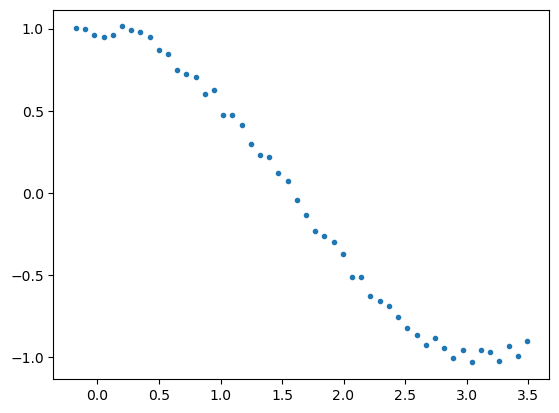

In [77]:
plt.scatter(x, y , marker='.')

In [78]:
model = linear_model.LinearRegression()

In [79]:
model.fit(x,y)

LinearRegression()

In [80]:
model.score(x,y)

0.963536993627776

In [81]:
p= model.predict(x)

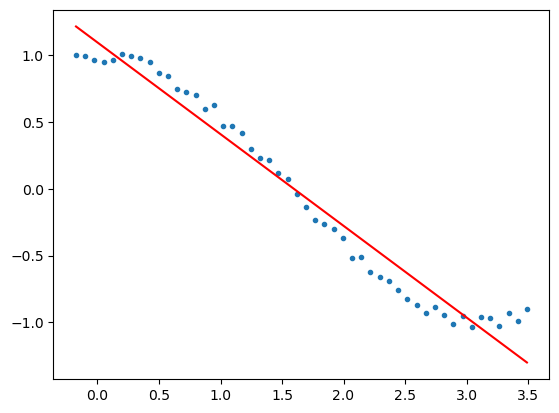

In [82]:
plt.scatter(x,y,marker='.');
plt.plot(x,p , color='red')

### make function to do modeling with different degree of polynominal 

In [124]:
def train ( x , y , d=1):
    T =  PolynomialFeatures(d)
    # add Polynomial Features as return 
    T.fit(x)
    x_new = T.transform(x)
    model = linear_model.LinearRegression()
    model.fit(x_new,y)
    p= model.predict(x_new)
    mae = mean_absolute_error(y,p)
    score = model.score(x_new,y)
    return model , T , score , mae
def trainWithPenaltyRidge( x , y , d=1 , alpha = 1):
    T =  PolynomialFeatures(d)
    # add Polynomial Features as return 
    T.fit(x)
    x_new = T.transform(x)
    model = linear_model.Ridge(alpha= alpha)
    model.fit(x_new,y)
    p= model.predict(x_new)
    mae = mean_absolute_error(y,p)
    score = model.score(x_new,y)
    return model , T , score , mae
def trainWithPenaltyLasso( x , y , d=1 , alpha = 1):
    T =  PolynomialFeatures(d)
    # add Polynomial Features as return 
    T.fit(x)
    x_new = T.transform(x)
    model = linear_model.Lasso(alpha= alpha)
    model.fit(x_new,y)
    p= model.predict(x_new)
    mae = mean_absolute_error(y,p)
    score = model.score(x_new,y)
    return model , T , score , mae
    

In [125]:
result = []
for i in range(1,15):
    res = train(x,y,i)
    result.append(res)
result

[(LinearRegression(),
  PolynomialFeatures(degree=1),
  0.963536993627776,
  0.12640319588642812),
 (LinearRegression(),
  PolynomialFeatures(),
  0.965591295827203,
  0.12414493159245113),
 (LinearRegression(),
  PolynomialFeatures(degree=3),
  0.9982456373041279,
  0.028134605880256548),
 (LinearRegression(),
  PolynomialFeatures(degree=4),
  0.9982466521946948,
  0.02808599358675095),
 (LinearRegression(),
  PolynomialFeatures(degree=5),
  0.9982820829478498,
  0.027788164362145675),
 (LinearRegression(),
  PolynomialFeatures(degree=6),
  0.9982886871135551,
  0.027887239682038382),
 (LinearRegression(),
  PolynomialFeatures(degree=7),
  0.9983098067777991,
  0.027656335909601495),
 (LinearRegression(),
  PolynomialFeatures(degree=8),
  0.9984269579301744,
  0.02657416424441264),
 (LinearRegression(),
  PolynomialFeatures(degree=9),
  0.998499589825051,
  0.026008948682149768),
 (LinearRegression(),
  PolynomialFeatures(degree=10),
  0.9985859418249434,
  0.024870141460772252),
 (Li

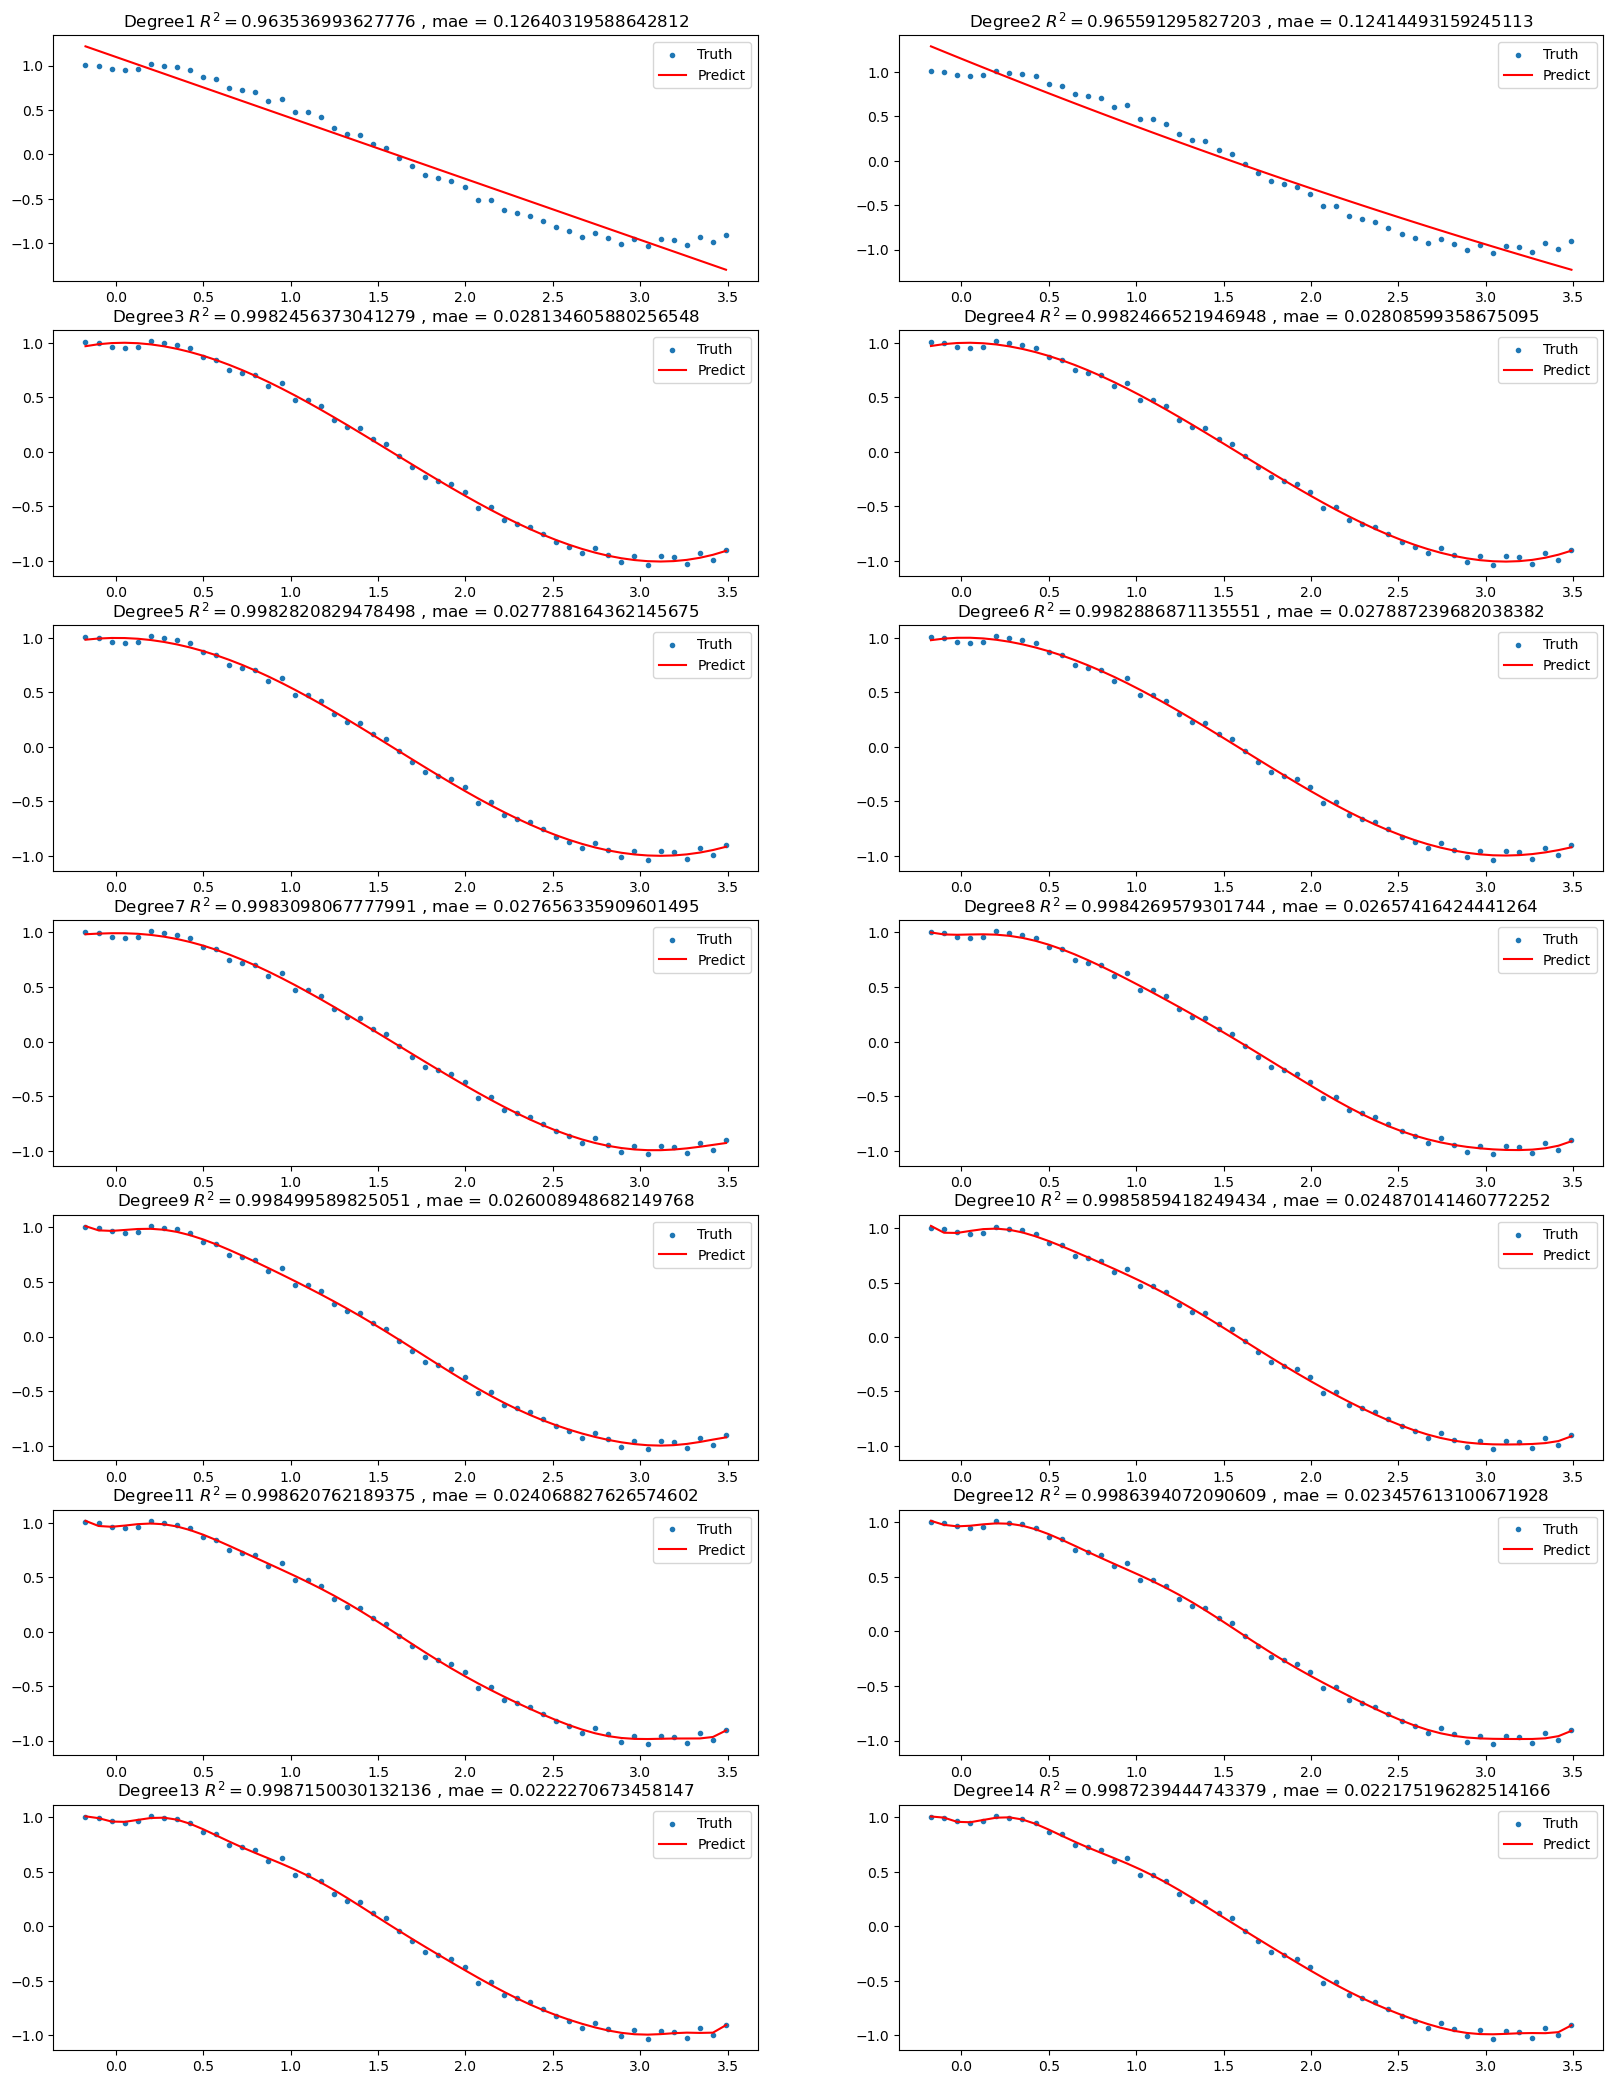

In [126]:
plt.figure(figsize=(20,30))
for i in range(1,15):
    plt.subplot(8,2,i)
    plt.scatter(x,y,marker='.')
    ri = result[i-1]
#    mi = ri[0]
#    ti = ri[1]
    mi,ti,scorei,maei = ri
    x_new = ti.transform(x)
    pi= mi.predict(x_new)
    plt.plot(x , pi ,'r')
    plt.legend(['Truth', 'Predict'])
    plt.title(f'Degree{i} $R^2 = {scorei}$ , mae = {maei}')

Text(0.5, 1.0, 'Degree14 $R^2 = 0.9906062047598915$ , mae = 0.0589979407841202')

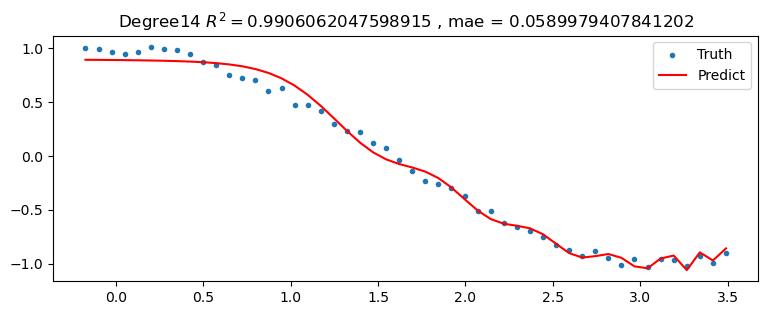

In [127]:
plt.figure(figsize=(20,30))
plt.subplot(8,2,i)
plt.scatter(x,y,marker='.')
ri = train(x,y,30)
#    mi = ri[0]
#    ti = ri[1]
mi,ti,scorei,maei = ri
x_new = ti.transform(x)
pi= mi.predict(x_new)
plt.plot(x , pi ,'r')
plt.legend(['Truth', 'Predict'])
plt.title(f'Degree{i} $R^2 = {scorei}$ , mae = {maei}')

Text(0.5, 1.0, 'Degree14 $R^2 = 0.9735192973222094$ , mae = 0.09348078510232265')

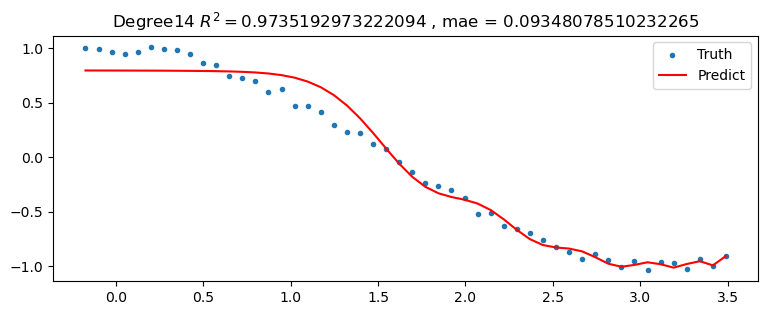

In [131]:
plt.figure(figsize=(20,30))
plt.subplot(8,2,i)
plt.scatter(x,y,marker='.')
ri = trainWithPenaltyRidge(x,y,30, 500)
#    mi = ri[0]
#    ti = ri[1]
mi,ti,scorei,maei = ri
x_new = ti.transform(x)
pi= mi.predict(x_new)
plt.plot(x , pi ,'r')
plt.legend(['Truth', 'Predict'])
plt.title(f'Degree{i} $R^2 = {scorei}$ , mae = {maei}')

/opt/anaconda3/envs/env-test/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.086e+00, tolerance: 2.849e-03
  model = cd_fast.enet_coordinate_descent(


Text(0.5, 1.0, 'Degree14 $R^2 = 0.8890095714909161$ , mae = 0.2052583934428909')

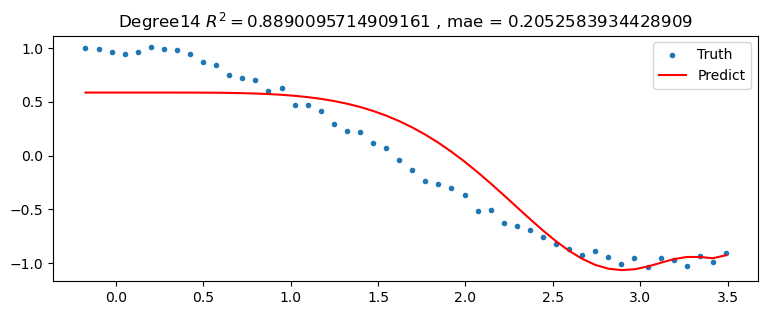

In [134]:
plt.figure(figsize=(20,30))
plt.subplot(8,2,i)
plt.scatter(x,y,marker='.')
ri = trainWithPenaltyLasso(x,y,30, 1)
#    mi = ri[0]
#    ti = ri[1]
mi,ti,scorei,maei = ri
x_new = ti.transform(x)
pi= mi.predict(x_new)
plt.plot(x , pi ,'r')
plt.legend(['Truth', 'Predict'])
plt.title(f'Degree{i} $R^2 = {scorei}$ , mae = {maei}')